In [1]:
# Basics
import numpy as np
import pandas as pd
import os

# Scipy
from scipy import optimize
from scipy.ndimage import gaussian_filter
#from sklearn.neighbors import KDTree
from scipy import stats

# Plotting
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator, AutoLocator, MaxNLocator
import matplotlib.gridspec as gridspec
from matplotlib.colorbar import Colorbar
import matplotlib.colors as mcolors
from matplotlib import colors
import matplotlib.ticker as ticker
from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D

# RC params
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
rcParams["axes.edgecolor"] = 'black'
rcParams["legend.edgecolor"] = '0.8'
plt.rcParams.update({'errorbar.capsize': 2})
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

def fmt(x, pos):
    ''' Used for the x10^ for colourbars'''
    if x == 0:
        return r'0'
    a, b = '{:.1e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

In [2]:
model_to_analyse = 'gcmp38'

model_path = "/Users/maddie/Desktop/Thesis/Simulation_output/2_phase_sims/magellan3/" + model_to_analyse
os.chdir(model_path)

In [3]:
timesteps = np.load('timestep.npy')
if len(timesteps) == 3:
    no_of_steps = timesteps.size  # if no repeated time step
else:
    #no_of_steps = timesteps.size - 1 # take 1 if repeated final time step
    no_of_steps = timesteps.size

print('Timesteps of ', timesteps)

Timesteps of  [0.0000000e+00 7.0505499e+07 1.4100564e+08 2.1150564e+08 2.8200564e+08
 3.5250564e+08 3.5250564e+08]


In [4]:
col_header = ['x', 'y', 'z', 'vx', 'vy', 'vz', 'iwas', 'gid', 'mass', 'h', 'd', 'c', 'tt', 'frah', 
              'm_H', 'm_He', 'm_C', 'm_N', 'm_O', 'm_Fe', 'm_Mg', 'm_Ca', 'm_Si', 'm_S', 'm_Ba', 
              'd_H', 'd_He', 'd_C', 'd_N', 'd_O', 'd_Fe', 'd_Mg', 'd_Ca', 'd_Si', 'd_S', 'd_Ba', 'id']


df_g = [] # List of gas data frames
df_d = [] # List of disc stars data frames
df_n = [] # List of new stars data frames

for i in range(no_of_steps):

    df_g.append(pd.DataFrame(np.load('gas'+str(i)+'.npy'), columns=col_header))
    
    df_d.append(pd.DataFrame(np.load('gal'+str(i)+'.npy'), columns=col_header))
    
    # Caution for empty frames
    try: 
        df_n.append(pd.DataFrame(np.load('new'+str(i)+'.npy'), columns=col_header))
    except:
        df_n.append(-1)


In [7]:
path = "1_output_visualisation"
try:
    os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s" % path)
    
    
os.chdir(path)
print('Current directory:', os.getcwd())

Creation of the directory 1_output_visualisation failed
Current directory: /Users/maddie/Desktop/Thesis/Simulation_output/2_phase_sims/magellan3/gcmp38/1_output_visualisation


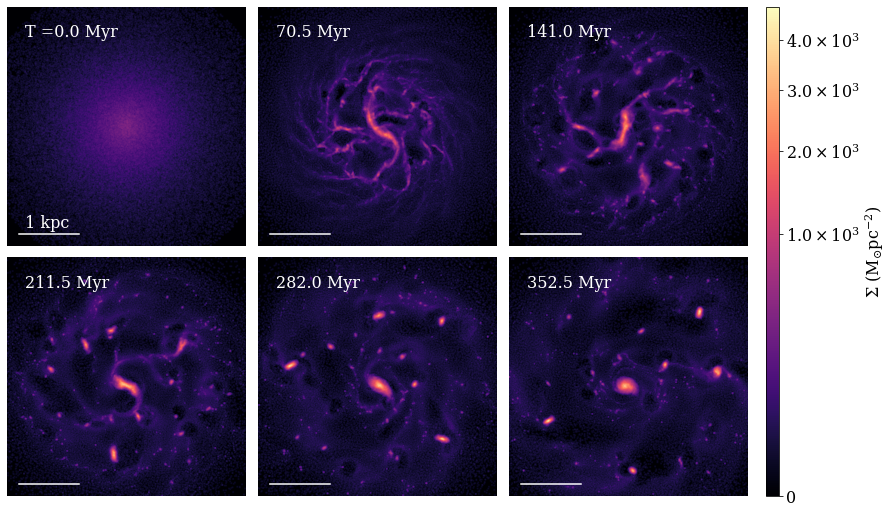

In [11]:
# For visualising the entire galaxy
rang = 2000
bin_size = 400



hist1, xedges, yedges = np.histogram2d(df_g[0].x, df_g[0].y, bins = bin_size, weights = df_g[0].mass, range=([-rang,rang],[-rang,rang]))
hist2, xedges, yedges = np.histogram2d(df_g[1].x, df_g[1].y, bins = bin_size, weights = df_g[1].mass, range=([-rang,rang],[-rang,rang]))
hist3, xedges, yedges = np.histogram2d(df_g[2].x, df_g[2].y, bins = bin_size, weights = df_g[2].mass, range=([-rang,rang],[-rang,rang]))

hist4, xedges, yedges = np.histogram2d(df_g[3].x, df_g[3].y, bins = bin_size, weights = df_g[3].mass, range=([-rang,rang],[-rang,rang]))
hist5, xedges, yedges = np.histogram2d(df_g[4].x, df_g[4].y, bins = bin_size, weights = df_g[4].mass, range=([-rang,rang],[-rang,rang]))
hist6, xedges, yedges = np.histogram2d(df_g[5].x, df_g[5].y, bins = bin_size, weights = df_g[5].mass, range=([-rang,rang],[-rang,rang]))

# / by 10^2
hist1 /=100
hist2 /=100
hist3 /=100
hist4 /=100
hist5 /=100
hist6 /=100


max_1 = np.max(hist1)
max_2 = np.max(hist2)
max_3 = np.max(hist3)
max_4 = np.max(hist4)
max_5 = np.max(hist5)
max_6 = np.max(hist6)

all_max = np.max([max_1, max_2, max_3, max_4, max_5, max_6])

props = dict(facecolor='white',alpha=0.9) 
shading = 'quadric'
gamma = 0.4
cmap = plt.cm.get_cmap('magma')

fig = plt.figure()
fig.set_size_inches(12,8)
gs = fig.add_gridspec(2,5, width_ratios=[1,1,1,0.05, 0.05])  


cbax1 = plt.subplot(gs[:,4])

ax00 = plt.subplot(gs[0,0]) # top left
ax01 = plt.subplot(gs[0,1]) # top middle
ax02 = plt.subplot(gs[0,2]) # top right

ax10 = plt.subplot(gs[1,0]) # top left
ax11 = plt.subplot(gs[1,1]) # top middle
ax12 = plt.subplot(gs[1,2]) # top right


time_x = -1700
time_y = 1500

im1 =ax00.imshow(hist1.T, norm=mcolors.PowerNorm(gamma), 
             origin='lower', extent=[-rang, rang, -rang, rang], cmap=cmap, vmax = all_max, interpolation = shading)
ax00.text(time_x, time_y, 'T =' + str(np.round(timesteps[0]/10**6, 1)) + ' Myr', color='white')
ax00.set_ylabel('Y (pc)')

im2 = ax01.imshow(hist2.T, norm=mcolors.PowerNorm(gamma), 
             origin='lower', extent=[-rang, rang, -rang, rang], cmap=cmap, vmax = all_max, interpolation = shading)
ax01.text(time_x, time_y,  str(np.round(timesteps[1]/10**6, 1)) + ' Myr', color='white')
im3 = ax02.imshow(hist3.T, norm=mcolors.PowerNorm(gamma), 
             origin='lower', extent=[-rang, rang, -rang, rang], cmap=cmap, vmax = all_max, interpolation = shading)
ax02.text(time_x, time_y, str(np.round(timesteps[2]/10**6, 1)) + ' Myr', color='white')


ax10.text(time_x, time_y, str(np.round(timesteps[3]/10**6, 1)) + ' Myr', color='white')
ax11.text(time_x, time_y, str(np.round(timesteps[4]/10**6, 1)) + ' Myr', color='white')
ax12.text(time_x, time_y, str(np.round(timesteps[5]/10**6, 1)) + ' Myr', color='white')




im1 =ax10.imshow(hist4.T, norm=mcolors.PowerNorm(gamma), 
             origin='lower', extent=[-rang, rang, -rang, rang], cmap=cmap, vmax = all_max, interpolation = shading)

im2 = ax11.imshow(hist5.T, norm=mcolors.PowerNorm(gamma), 
             origin='lower', extent=[-rang, rang, -rang, rang], cmap=cmap, vmax = all_max, interpolation = shading)
im3 = ax12.imshow(hist6.T, norm=mcolors.PowerNorm(gamma), 
             origin='lower', extent=[-rang, rang, -rang, rang], cmap=cmap, vmax = all_max, interpolation = shading)

scale_bar_x = [-1800,-800]
scale_bar_y = [-1800, -1800]

scale_text_x = -1700
scale_text_y = -1700

ax00.plot(scale_bar_x, scale_bar_y, color='white')
ax01.plot(scale_bar_x, scale_bar_y, color='white')
ax02.plot(scale_bar_x, scale_bar_y, color='white')
ax10.plot(scale_bar_x, scale_bar_y, color='white')
ax11.plot(scale_bar_x, scale_bar_y, color='white')
ax12.plot(scale_bar_x, scale_bar_y, color='white')

ax00.axis('off')
ax01.axis('off')
ax02.axis('off')
ax10.axis('off')
ax11.axis('off')
ax12.axis('off')

ax00.text(scale_text_x, scale_text_y, '1 kpc', color='white')
#ax01.text(scale_text_x, scale_text_y, '1 kpc', color='white')
#ax02.text(scale_text_x, scale_text_y, '1 kpc', color='white')
#ax10.text(scale_text_x, scale_text_y, '1 kpc', color='white')
#ax11.text(scale_text_x, scale_text_y, '1 kpc', color='white')
#ax12.text(scale_text_x, scale_text_y, '1 kpc', color='white')

cb1 = Colorbar(ax = cbax1, mappable = im1, format=ticker.FuncFormatter(fmt))
cb1.set_label(r'$\Sigma \ (\rm{M}_{\odot} \rm{pc}^{-2})$')


gs.update(left=0.05, right=0.95, bottom=0.08, top=0.93, wspace=0.0, hspace=0.05)   

#plt.savefig('gas_evolution', bbox_inches='tight', dpi = 300)
plt.show()

## Labeled clump plots

NameError: name 'max_x' is not defined

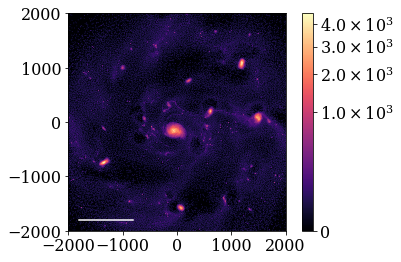

In [12]:

rang = 2000
bin_size = 4000
cmap = plt.cm.get_cmap('magma')
gamma = 0.4
i = 6
hist1, xedges, yedges = np.histogram2d(df_g[i].x, df_g[i].y, bins = bin_size, weights = df_g[i].mass, range=([-rang,rang],[-rang,rang]))
smoothing_sigma = 5
hist1 = gaussian_filter(hist1, sigma=smoothing_sigma) #because of per 100 pc bins
fig, ax1 = plt.subplots()

im2 = ax1.imshow(hist1.T, norm=mcolors.PowerNorm(gamma), 
             origin='lower', extent=[-rang, rang, -rang, rang], cmap=cmap)
ax1.plot([-1800,-800], [-1800, -1800], color='white')
cbar = fig.colorbar(im2, ax=ax1, format=ticker.FuncFormatter(fmt))

ax1.scatter(max_x[clump_numbers], max_y[clump_numbers], s=200, facecolors='none', edgecolors='white')
#ax1.scatter(max_x, max_y, s=100, facecolors='none', edgecolors='white')
ax1.set_ylabel('Y (pc)')
ax1.set_xlabel('X (pc)')
#ax1.set_title('$\Sigma_{ H_2 }$')
cbar.set_label(r'$\Sigma $    (M$_\odot$ pc$^{-2}$)', labelpad = 10)
plt.axis('off')
cbar.ax.minorticks_on()
ax1.text(-1650, -1700, '1 kpc', c = 'white')

ax1.text(-200, 70, 'C1', color='white')
ax1.text(1300, 250, 'C2', color='white')
ax1.text(1050, 1300, 'C3', color='white')
ax1.text(-1500, -500, 'C4', color='white')
ax1.text(-20, -1400, 'C5', color='white')
ax1.text(500, 400, 'C6', color='white')
ax1.text(100, 950, 'C7', color='white')
ax1.text(-1200, 1200, 'C8', color='white')


#plt.savefig('clump_ID'+ str(i), bbox_inches='tight', dpi = 300)
plt.show()

256.79352 391.5


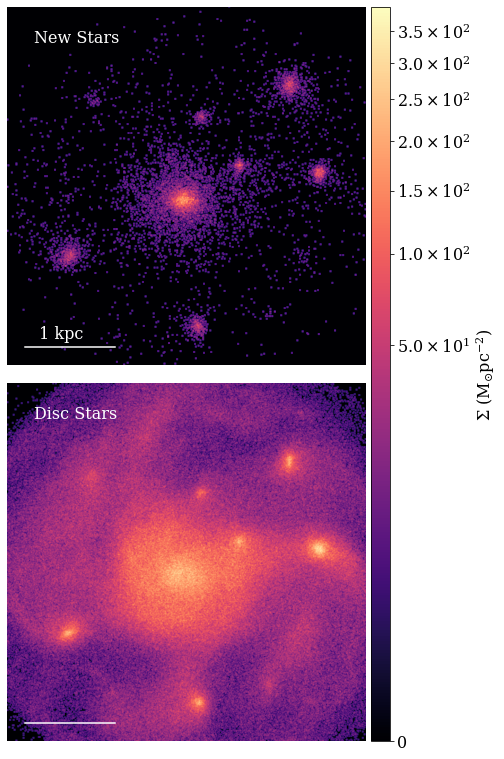

In [29]:
rang = 2000
bin_size = 400
hist1, xedges, yedges = np.histogram2d(df_n[-1].x, df_n[-1].y, bins = bin_size, weights = df_n[-1].mass, range=([-rang,rang],[-rang,rang]))
hist2, xedges, yedges = np.histogram2d(df_d[-1].x, df_d[-1].y, bins = bin_size, weights = df_d[-1].mass, range=([-rang,rang],[-rang,rang]))

gamma = 0.3
# / by 10^2
hist1 /=100
hist2 /=100


max_1 = np.max(hist1)
max_2 = np.max(hist2)
print(max_1, max_2)

all_max_1 = np.max([max_1, max_2])


fig = plt.figure()
fig.set_size_inches(6,12)
gs = fig.add_gridspec(2,2, width_ratios=[1,0.05])  


cbax1 = plt.subplot(gs[:,1])

ax0 = plt.subplot(gs[0,0]) # top 
ax1 = plt.subplot(gs[1,0]) # bottom

im1 =ax0.imshow(hist1.T, norm=mcolors.PowerNorm(gamma), 
             origin='lower', extent=[-rang, rang, -rang, rang], cmap=cmap, vmax = all_max_1, interpolation = shading)

ax1.imshow(hist2.T, norm=mcolors.PowerNorm(gamma), 
             origin='lower', extent=[-rang, rang, -rang, rang], cmap=cmap, vmax = all_max_1, interpolation = shading)

time_x = -1700
time_y = 1600

ax0.text(time_x, time_y, 'New Stars', color='white')
ax1.text(time_x, time_y, 'Disc Stars', color='white')

ax1.scatter(max_x[clump_numbers], max_y[clump_numbers], s=200, facecolors='none', edgecolors='white')
ax1.scatter(max_x[clump_numbers], max_y[clump_numbers], s=200, facecolors='none', edgecolors='white')


scale_bar_x = [-1800,-800]
scale_bar_y = [-1800, -1800]

scale_text_x = -1700
scale_text_y = -1700
ax0.text(-1650, -1700, '1 kpc', c = 'white')
ax0.plot(scale_bar_x, scale_bar_y, color='white')
ax1.plot(scale_bar_x, scale_bar_y, color='white')

ax0.axis('off')
ax1.axis('off')



cb1 = Colorbar(ax = cbax1, mappable = im1, format=ticker.FuncFormatter(fmt))
cb1.set_label(r'$\Sigma \ (\rm{M}_{\odot} \rm{pc}^{-2})$')
gs.update(left=0.05, right=0.95, bottom=0.08, top=0.93, wspace=0.0, hspace=0.05)   
plt.show()

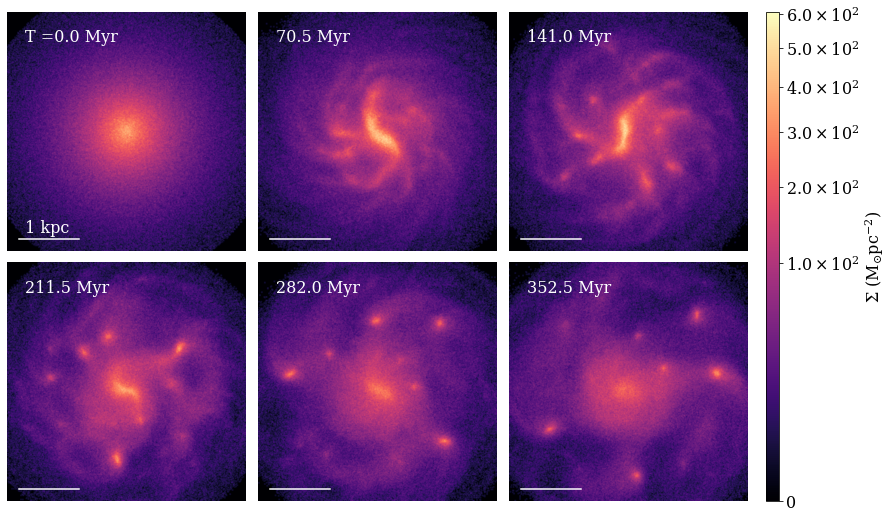

In [10]:
# For visualising the entire galaxy
rang = 2000
bin_size = 400



hist1, xedges, yedges = np.histogram2d(df_d[0].x, df_d[0].y, bins = bin_size, weights = df_d[0].mass, range=([-rang,rang],[-rang,rang]))
hist2, xedges, yedges = np.histogram2d(df_d[1].x, df_d[1].y, bins = bin_size, weights = df_d[1].mass, range=([-rang,rang],[-rang,rang]))
hist3, xedges, yedges = np.histogram2d(df_d[2].x, df_d[2].y, bins = bin_size, weights = df_d[2].mass, range=([-rang,rang],[-rang,rang]))

hist4, xedges, yedges = np.histogram2d(df_d[3].x, df_d[3].y, bins = bin_size, weights = df_d[3].mass, range=([-rang,rang],[-rang,rang]))
hist5, xedges, yedges = np.histogram2d(df_d[4].x, df_d[4].y, bins = bin_size, weights = df_d[4].mass, range=([-rang,rang],[-rang,rang]))
hist6, xedges, yedges = np.histogram2d(df_d[5].x, df_d[5].y, bins = bin_size, weights = df_d[5].mass, range=([-rang,rang],[-rang,rang]))

# / by 10^2
hist1 /=100
hist2 /=100
hist3 /=100
hist4 /=100
hist5 /=100
hist6 /=100


max_1 = np.max(hist1)
max_2 = np.max(hist2)
max_3 = np.max(hist3)
max_4 = np.max(hist4)
max_5 = np.max(hist5)
max_6 = np.max(hist6)

all_max = np.max([max_1, max_2, max_3, max_4, max_5, max_6])

props = dict(facecolor='white',alpha=0.9) 
shading = 'quadric'
gamma = 0.4
cmap = plt.cm.get_cmap('magma')

fig = plt.figure()
fig.set_size_inches(12,8)
gs = fig.add_gridspec(2,5, width_ratios=[1,1,1,0.05, 0.05])  


cbax1 = plt.subplot(gs[:,4])

ax00 = plt.subplot(gs[0,0]) # top left
ax01 = plt.subplot(gs[0,1]) # top middle
ax02 = plt.subplot(gs[0,2]) # top right

ax10 = plt.subplot(gs[1,0]) # top left
ax11 = plt.subplot(gs[1,1]) # top middle
ax12 = plt.subplot(gs[1,2]) # top right


time_x = -1700
time_y = 1500

im1 =ax00.imshow(hist1.T, norm=mcolors.PowerNorm(gamma), 
             origin='lower', extent=[-rang, rang, -rang, rang], cmap=cmap, vmax = all_max, interpolation = shading)
ax00.text(time_x, time_y, 'T =' + str(np.round(timesteps[0]/10**6, 1)) + ' Myr', color='white')
ax00.set_ylabel('Y (pc)')

im2 = ax01.imshow(hist2.T, norm=mcolors.PowerNorm(gamma), 
             origin='lower', extent=[-rang, rang, -rang, rang], cmap=cmap, vmax = all_max, interpolation = shading)
ax01.text(time_x, time_y,  str(np.round(timesteps[1]/10**6, 1)) + ' Myr', color='white')
im3 = ax02.imshow(hist3.T, norm=mcolors.PowerNorm(gamma), 
             origin='lower', extent=[-rang, rang, -rang, rang], cmap=cmap, vmax = all_max, interpolation = shading)
ax02.text(time_x, time_y, str(np.round(timesteps[2]/10**6, 1)) + ' Myr', color='white')


ax10.text(time_x, time_y, str(np.round(timesteps[3]/10**6, 1)) + ' Myr', color='white')
ax11.text(time_x, time_y, str(np.round(timesteps[4]/10**6, 1)) + ' Myr', color='white')
ax12.text(time_x, time_y, str(np.round(timesteps[5]/10**6, 1)) + ' Myr', color='white')




im1 =ax10.imshow(hist4.T, norm=mcolors.PowerNorm(gamma), 
             origin='lower', extent=[-rang, rang, -rang, rang], cmap=cmap, vmax = all_max, interpolation = shading)

im2 = ax11.imshow(hist5.T, norm=mcolors.PowerNorm(gamma), 
             origin='lower', extent=[-rang, rang, -rang, rang], cmap=cmap, vmax = all_max, interpolation = shading)
im3 = ax12.imshow(hist6.T, norm=mcolors.PowerNorm(gamma), 
             origin='lower', extent=[-rang, rang, -rang, rang], cmap=cmap, vmax = all_max, interpolation = shading)

scale_bar_x = [-1800,-800]
scale_bar_y = [-1800, -1800]

scale_text_x = -1700
scale_text_y = -1700

ax00.plot(scale_bar_x, scale_bar_y, color='white')
ax01.plot(scale_bar_x, scale_bar_y, color='white')
ax02.plot(scale_bar_x, scale_bar_y, color='white')
ax10.plot(scale_bar_x, scale_bar_y, color='white')
ax11.plot(scale_bar_x, scale_bar_y, color='white')
ax12.plot(scale_bar_x, scale_bar_y, color='white')

ax00.axis('off')
ax01.axis('off')
ax02.axis('off')
ax10.axis('off')
ax11.axis('off')
ax12.axis('off')

ax00.text(scale_text_x, scale_text_y, '1 kpc', color='white')
#ax01.text(scale_text_x, scale_text_y, '1 kpc', color='white')
#ax02.text(scale_text_x, scale_text_y, '1 kpc', color='white')
#ax10.text(scale_text_x, scale_text_y, '1 kpc', color='white')
#ax11.text(scale_text_x, scale_text_y, '1 kpc', color='white')
#ax12.text(scale_text_x, scale_text_y, '1 kpc', color='white')

cb1 = Colorbar(ax = cbax1, mappable = im1, format=ticker.FuncFormatter(fmt))
cb1.set_label(r'$\Sigma \ (\rm{M}_{\odot} \rm{pc}^{-2})$')


gs.update(left=0.05, right=0.95, bottom=0.08, top=0.93, wspace=0.0, hspace=0.05)   

plt.savefig('disc_evolution', bbox_inches='tight', dpi = 300)
plt.show()

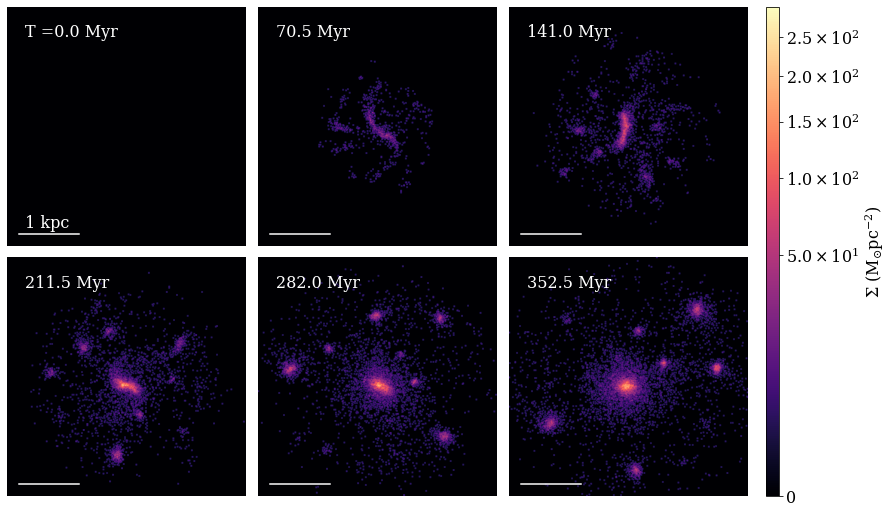

In [9]:
# For visualising the entire galaxy
rang = 2000
bin_size = 400



hist1, xedges, yedges = np.histogram2d([-20000], [-20000], bins = bin_size, weights = [-20000], range=([-rang,rang],[-rang,rang]))
hist2, xedges, yedges = np.histogram2d(df_n[1].x, df_n[1].y, bins = bin_size, weights = df_n[1].mass, range=([-rang,rang],[-rang,rang]))
hist3, xedges, yedges = np.histogram2d(df_n[2].x, df_n[2].y, bins = bin_size, weights = df_n[2].mass, range=([-rang,rang],[-rang,rang]))

hist4, xedges, yedges = np.histogram2d(df_n[3].x, df_n[3].y, bins = bin_size, weights = df_n[3].mass, range=([-rang,rang],[-rang,rang]))
hist5, xedges, yedges = np.histogram2d(df_n[4].x, df_n[4].y, bins = bin_size, weights = df_n[4].mass, range=([-rang,rang],[-rang,rang]))
hist6, xedges, yedges = np.histogram2d(df_n[5].x, df_n[5].y, bins = bin_size, weights = df_n[5].mass, range=([-rang,rang],[-rang,rang]))

# / by 10^2
hist1 /=100
hist2 /=100
hist3 /=100
hist4 /=100
hist5 /=100
hist6 /=100


max_1 = np.max(hist1)
max_2 = np.max(hist2)
max_3 = np.max(hist3)
max_4 = np.max(hist4)
max_5 = np.max(hist5)
max_6 = np.max(hist6)

all_max = np.max([max_1, max_2, max_3, max_4, max_5, max_6])

props = dict(facecolor='white',alpha=0.9) 
shading = 'quadric'
gamma = 0.4
cmap = plt.cm.get_cmap('magma')

fig = plt.figure()
fig.set_size_inches(12,8)
gs = fig.add_gridspec(2,5, width_ratios=[1,1,1,0.05, 0.05])  


cbax1 = plt.subplot(gs[:,4])

ax00 = plt.subplot(gs[0,0]) # top left
ax01 = plt.subplot(gs[0,1]) # top middle
ax02 = plt.subplot(gs[0,2]) # top right

ax10 = plt.subplot(gs[1,0]) # top left
ax11 = plt.subplot(gs[1,1]) # top middle
ax12 = plt.subplot(gs[1,2]) # top right


time_x = -1700
time_y = 1500

im1 =ax00.imshow(hist1.T, norm=mcolors.PowerNorm(gamma), 
             origin='lower', extent=[-rang, rang, -rang, rang], cmap=cmap, vmax = all_max, interpolation = shading)
ax00.text(time_x, time_y, 'T =' + str(np.round(timesteps[0]/10**6, 1)) + ' Myr', color='white')
ax00.set_ylabel('Y (pc)')

im2 = ax01.imshow(hist2.T, norm=mcolors.PowerNorm(gamma), 
             origin='lower', extent=[-rang, rang, -rang, rang], cmap=cmap, vmax = all_max, interpolation = shading)
ax01.text(time_x, time_y,  str(np.round(timesteps[1]/10**6, 1)) + ' Myr', color='white')
im3 = ax02.imshow(hist3.T, norm=mcolors.PowerNorm(gamma), 
             origin='lower', extent=[-rang, rang, -rang, rang], cmap=cmap, vmax = all_max, interpolation = shading)
ax02.text(time_x, time_y, str(np.round(timesteps[2]/10**6, 1)) + ' Myr', color='white')


ax10.text(time_x, time_y, str(np.round(timesteps[3]/10**6, 1)) + ' Myr', color='white')
ax11.text(time_x, time_y, str(np.round(timesteps[4]/10**6, 1)) + ' Myr', color='white')
ax12.text(time_x, time_y, str(np.round(timesteps[5]/10**6, 1)) + ' Myr', color='white')




im1 =ax10.imshow(hist4.T, norm=mcolors.PowerNorm(gamma), 
             origin='lower', extent=[-rang, rang, -rang, rang], cmap=cmap, vmax = all_max, interpolation = shading)

im2 = ax11.imshow(hist5.T, norm=mcolors.PowerNorm(gamma), 
             origin='lower', extent=[-rang, rang, -rang, rang], cmap=cmap, vmax = all_max, interpolation = shading)
im3 = ax12.imshow(hist6.T, norm=mcolors.PowerNorm(gamma), 
             origin='lower', extent=[-rang, rang, -rang, rang], cmap=cmap, vmax = all_max, interpolation = shading)

scale_bar_x = [-1800,-800]
scale_bar_y = [-1800, -1800]

scale_text_x = -1700
scale_text_y = -1700

ax00.plot(scale_bar_x, scale_bar_y, color='white')
ax01.plot(scale_bar_x, scale_bar_y, color='white')
ax02.plot(scale_bar_x, scale_bar_y, color='white')
ax10.plot(scale_bar_x, scale_bar_y, color='white')
ax11.plot(scale_bar_x, scale_bar_y, color='white')
ax12.plot(scale_bar_x, scale_bar_y, color='white')

ax00.axis('off')
ax01.axis('off')
ax02.axis('off')
ax10.axis('off')
ax11.axis('off')
ax12.axis('off')

ax00.text(scale_text_x, scale_text_y, '1 kpc', color='white')
#ax01.text(scale_text_x, scale_text_y, '1 kpc', color='white')
#ax02.text(scale_text_x, scale_text_y, '1 kpc', color='white')
#ax10.text(scale_text_x, scale_text_y, '1 kpc', color='white')
#ax11.text(scale_text_x, scale_text_y, '1 kpc', color='white')
#ax12.text(scale_text_x, scale_text_y, '1 kpc', color='white')

cb1 = Colorbar(ax = cbax1, mappable = im1, format=ticker.FuncFormatter(fmt))
cb1.set_label(r'$\Sigma \ (\rm{M}_{\odot} \rm{pc}^{-2})$')


gs.update(left=0.05, right=0.95, bottom=0.08, top=0.93, wspace=0.0, hspace=0.05)   

plt.savefig('new_evolution', bbox_inches='tight', dpi = 300)
plt.show()